## 基于中文维基百科数据训练word2vec词向量

#### 1. 维基百科数据下载：[中文维基百科数据](https://dumps.wikimedia.org/zhwiki/20190720/)  
#### 2. 使用WikiExtractor抽取数据：[WikiExtractor工具](https://github.com/attardi/wikiextractor)  
#### 3. 数据预处理：
   （1）抽取文本内容  
   （2）简繁转换  
   （3）分词  
#### 4. 模型训练
#### 5. 可视化前500个词向量


In [17]:
import re
import jieba
from hanziconv import HanziConv
from gensim.models import Word2Vec
from gensim.models import word2vec
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
PATH = r'D:\ml_code\word2vec\processed\AA'

###  数据预处理
1.中文提取  
2.简繁转换  
3.分词

In [ ]:
temp = []
pattern1 = re.compile('<.*?>')
pattern2 = re.compile(u"[\u4e00-\u9fa5]+")

for d in range(3):
    with open(PATH+r'\wiki_0'+str(d),'r',encoding='utf-8') as f:
        for each in f.readlines():
            res = re.sub(pattern1,'end',each).replace('\n','')
            temp.append(res) #简繁转换
            
raw = ''.join(temp).split('end')
raw_ = list(filter(None,raw))


cleaned = [''.join(re.findall(pattern2,atc)) for atc in raw_] #去除标点符号等非中文字符
simplified = [HanziConv.toSimplified(s) for s in cleaned] #简繁转换
cuted = [' '.join(jieba.lcut(s)) for s in simplified] #分词

In [ ]:
#保存分词后数据，每个词条存一行
with open(PATH+r'\training_data.txt','w',encoding='utf-8') as f2:
    for each in cuted:   
        f2.write(each)
        f2.write('\n')

### 模型训练

In [ ]:
data = word2vec.LineSentence(PATH + r'\training_data.txt')
model = Word2Vec(data,size=300,window=10,sg=1,min_count=10,workers=4)
model.save(PATH + r'\wiki_sg.model')

In [3]:
#此处加载已经在本地训练好的模型
wiki_sg_model = Word2Vec.load(PATH + r'\wiki_sg.model

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
wiki_sg_model.wv.most_similar(['自然语言'],topn=10) #相似度最高的10个词

[('消歧', 0.725261390209198),
 ('语义', 0.7109772562980652),
 ('语义学', 0.7021760940551758),
 ('语法分析', 0.7019819021224976),
 ('词袋', 0.6846531629562378),
 ('语料库', 0.6769741773605347),
 ('文本处理', 0.6750401258468628),
 ('语法结构', 0.6731961369514465),
 ('形式语言', 0.6716905236244202),
 ('置标语言', 0.6697630882263184)]

In [6]:
wiki_sg_model.wv.similarity('娃哈哈','医生') #给定词语相似性

0.18412755

In [16]:
#wiki_sg_model.wv['香港'] #查看词向量

### 词向量可视化

In [14]:
def tsne_plot(model):
    tokens=[]
    labels=[]
    i = 0
    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        if i>500:break
        i += 1

    tsne_model = TSNE(n_components=2,perplexity=30,init='pca',random_state=23)    
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

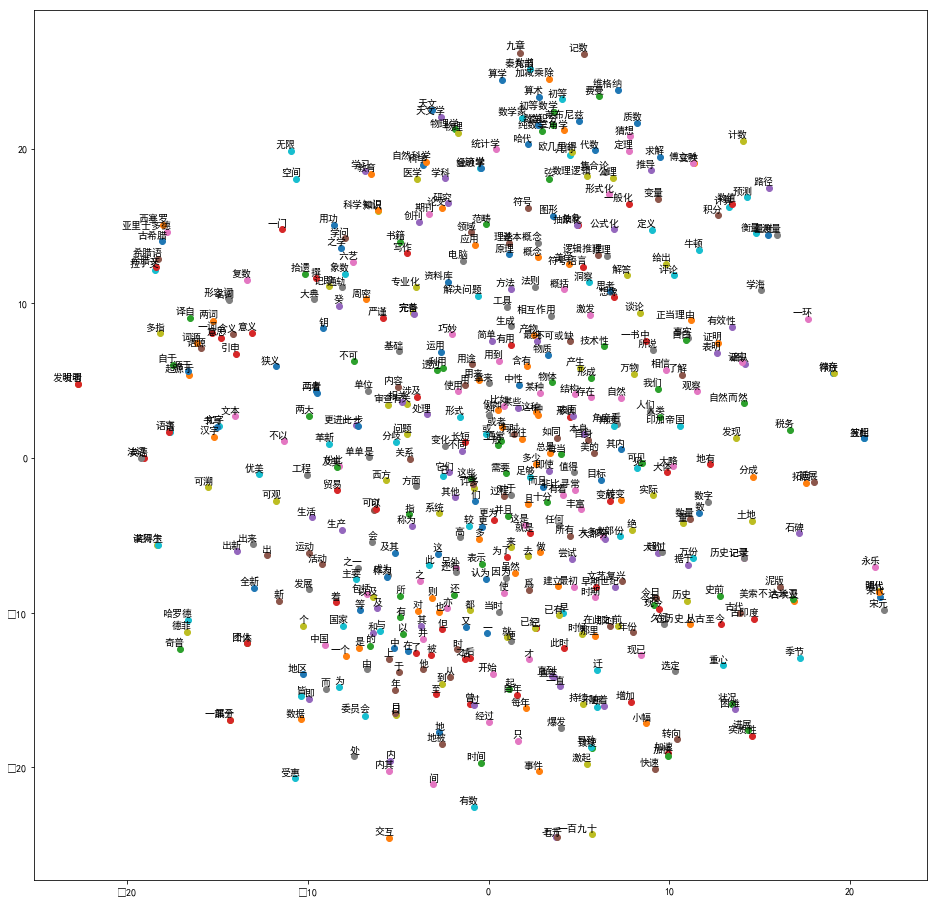

In [15]:
plt.rcParams['font.sans-serif'] = ['SimHei']
tsne_plot(wiki_sg_model)

参考：  
